In [1]:
import pandas as pd
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpInteger

# 读取数据
data = pd.read_excel('合并后的汇总表_更新.xlsx')

# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

data['类别'] = data['食物名称'].map(food_types)

# 提取用于优化的数据列
cost = data['价格（元/份）'].to_list()
calories = data['实际摄入能量kcal'].to_list()
protein = data['实际摄入蛋白质g'].to_list()
fat = data['实际摄入脂肪g'].to_list()
carbs = data['实际摄入碳水化合物g'].to_list()
calcium = data['实际摄入钙（mg）'].to_list()
iron = data['实际摄入铁（mg）'].to_list()
zinc = data['实际摄入锌（mg）'].to_list()
vitamin_a = data['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = data['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = data['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = data['实际摄入维生素C（mg）'].to_list()

# 创建优化模型
model = LpProblem(name="diet_optimization", sense=LpMinimize)

# 定义决策变量
x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0, upBound=3) for i in range(len(cost))]  # 添加数量上限约束

# 定义目标函数：最小化成本
model += lpSum(cost[i] * x[i] for i in range(len(cost))), "Total Cost"

# 添加约束条件
# 确保每天摄入食物种类不少于12种
model += lpSum([x[i] != 0 for i in range(len(cost))]) >= 12, "Minimum Food Types"

# 确保每天摄入的食物包括五大类别
food_categories = data['类别'].unique()
for category in food_categories:
    model += lpSum([x[i] for i in range(len(cost)) if data['类别'][i] == category]) >= 1, f"{category} Category Constraint"

# 能量摄入要求
target_calories = 2400
model += lpSum(calories[i] * x[i] for i in range(len(cost))) >= 0.9 * target_calories, "Min Calories"
model += lpSum(calories[i] * x[i] for i in range(len(cost))) <= 1.1 * target_calories, "Max Calories"

# 微量营养素约束
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) >= 700, "Min Calcium"
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) <= 900, "Max Calcium"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) >= 11, "Min Iron"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) <= 13, "Max Iron"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) >= 10, "Min Zinc"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) <= 14, "Max Zinc"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) >= 700, "Min Vitamin A"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) <= 900, "Max Vitamin A"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B1"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B1"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B2"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B2"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) >= 90, "Min Vitamin C"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) <= 110, "Max Vitamin C"

# 宏量营养素约束
total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(cost))]
model += lpSum(4 * protein[i] * x[i] for i in range(len(cost))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Min Protein"
model += lpSum(4 * protein[i] * x[i] for i in range(len(cost))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Max Protein"
model += lpSum(9 * fat[i] * x[i] for i in range(len(cost))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Min Fat"
model += lpSum(9 * fat[i] * x[i] for i in range(len(cost))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Max Fat"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(cost))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Min Carbs"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(cost))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Max Carbs"

# 求解模型
model.solve()

# 打印结果
selected_foods = []
selected_quantities = []
selected_meals = []
selected_prices = []

for i in range(len(cost)):
    if x[i].varValue > 0:
        selected_foods.append(data['食物名称'][i])
        selected_quantities.append(x[i].varValue)
        selected_meals.append(data['餐次'][i])
        selected_prices.append(cost[i])
        print(f"食品 {data['食物名称'][i]}: {x[i].varValue} 份，餐次：{data['餐次'][i]}，单价：{cost[i]} 元")

print("总成本：", sum(cost[i] * x[i].varValue for i in range(len(cost))))

# 生成结果表格
result_df = pd.DataFrame({
    '餐次': selected_meals,
    '食物名称': selected_foods,
    '数量（份）': selected_quantities,
    '单价（元）': selected_prices
})

# 保存结果到Excel文件
result_df.to_excel('优化结果.xlsx', index=False)

# 显示结果表格
result_df



食品 大米饭: 3.0 份，餐次：午餐，单价：0.5 元
食品 炸鸡块: 1.0 份，餐次：午餐，单价：7.0 元
食品 葡萄: 1.0 份，餐次：午餐，单价：1.0 元
食品 牛奶: 2.0 份，餐次：早餐，单价：1.5 元
食品 大米粥: 3.0 份，餐次：早餐，单价：0.5 元
食品 大米饭: 3.0 份，餐次：早餐，单价：0.5 元
食品 煮鸡蛋: 3.0 份，餐次：早餐，单价：1.0 元
食品 蒸地瓜: 3.0 份，餐次：早餐，单价：1.0 元
食品 拌土豆丝: 1.0 份，餐次：早餐，单价：4.0 元
食品 橙子: 2.0 份，餐次：早餐，单价：1.0 元
食品 大米饭: 3.0 份，餐次：晚餐，单价：0.5 元
食品 豆浆: 1.0 份，餐次：晚餐，单价：1.5 元
食品 葡萄: 3.0 份，餐次：晚餐，单价：1.0 元
总成本： 33.5


,餐次,食物名称,数量（份）,单价（元）
0,午餐,大米饭,3.0,0.5
1,午餐,炸鸡块,1.0,7.0
2,午餐,葡萄,1.0,1.0
3,早餐,牛奶,2.0,1.5
4,早餐,大米粥,3.0,0.5
5,早餐,大米饭,3.0,0.5
6,早餐,煮鸡蛋,3.0,1.0
7,早餐,蒸地瓜,3.0,1.0
8,早餐,拌土豆丝,1.0,4.0
9,早餐,橙子,2.0,1.0


总能量: 2312.37 kcal
总蛋白质: 85.88 g
总脂肪: 51.03 g
总碳水化合物: 372.66 g
总钙: 798.7 mg
总铁: 12.99 mg
总锌: 10.31 mg
总维生素A: 851.3 μg
总维生素B1: 1.2 mg
总维生素B2: 1.29 mg
总维生素C: 108.0 mg


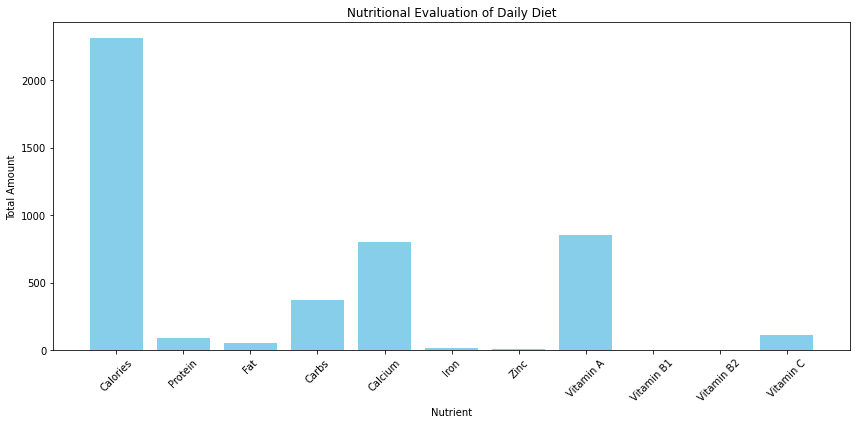

能量与目标值相差: -3.65%
Calcium 达成率: 99.84%
Iron 达成率: 86.60%
Zinc 达成率: 85.92%
Vitamin_a 达成率: 106.41%
Vitamin_b1 达成率: 85.71%
Vitamin_b2 达成率: 92.14%
Vitamin_c 达成率: 108.00%
蛋白质供能比例: 14.86%
脂肪供能比例: 19.86%
碳水化合物供能比例: 64.46%
午餐 的蛋白质氨基酸评分: 28.33
早餐 的蛋白质氨基酸评分: 90.19
晚餐 的蛋白质氨基酸评分: 78.32


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Daily Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 调用膳食营养评价函数
nutrition_results = evaluate_nutrition(selected_foods, selected_quantities, data)

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 调用函数进行能量和营养素评价
intake_ratios = evaluate_energy_and_nutrients(nutrition_results)

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 调用函数进行能量来源评价
energy_sources = evaluate_energy_sources(nutrition_results)

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data):
    reference_aa = {
        '异亮氨酸（mg）': 40,
        '亮氨酸（mg）': 70,
        '赖氨酸（mg）': 55,
        '含硫氨基酸（mg）': 35,
        '芳香族氨基酸（mg）': 60,
        '苏氨酸（mg）': 40,
        '色氨酸（mg）': 10,
        '缬氨酸（mg）': 50
    }

    amino_acid_scores = {}
    meals = data['餐次'].unique()

    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]

        total_aa = {aa: sum(data.loc[data['食物名称'] == food, f'实际摄入{aa}'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities)) for aa in reference_aa}
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        amino_acids_per_g_protein = {aa: total_aa[aa] / total_protein for aa in reference_aa}
        
        # 计算每餐的氨基酸评分
        scores = {aa: (amino_acids_per_g_protein[aa] / reference_aa[aa]) * 100 for aa in reference_aa}
        amino_acid_score = min(scores.values())
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores = evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data)



In [3]:
import pandas as pd
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpInteger

# 读取数据
data = pd.read_excel('合并后的汇总表_更新.xlsx')

# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

data['类别'] = data['食物名称'].map(food_types)

# 提取用于优化的数据列
cost = data['价格（元/份）'].to_list()
calories = data['实际摄入能量kcal'].to_list()
protein = data['实际摄入蛋白质g'].to_list()
fat = data['实际摄入脂肪g'].to_list()
carbs = data['实际摄入碳水化合物g'].to_list()
calcium = data['实际摄入钙（mg）'].to_list()
iron = data['实际摄入铁（mg）'].to_list()
zinc = data['实际摄入锌（mg）'].to_list()
vitamin_a = data['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = data['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = data['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = data['实际摄入维生素C（mg）'].to_list()

# 创建优化模型
model = LpProblem(name="diet_optimization", sense=LpMinimize)

# 定义决策变量
x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0, upBound=3) for i in range(len(cost))]  # 添加数量上限约束

# 定义目标函数：最小化成本
model += lpSum(cost[i] * x[i] for i in range(len(cost))), "Total Cost"

# 添加约束条件
# 确保每天摄入食物种类不少于12种
model += lpSum([x[i] != 0 for i in range(len(cost))]) >= 12, "Minimum Food Types"

# 确保每天摄入的食物包括五大类别
food_categories = data['类别'].unique()
for category in food_categories:
    model += lpSum([x[i] for i in range(len(cost)) if data['类别'][i] == category]) >= 1, f"{category} Category Constraint"

# 能量摄入要求
target_calories = 1900
model += lpSum(calories[i] * x[i] for i in range(len(cost))) >= 0.9 * target_calories, "Min Calories"
model += lpSum(calories[i] * x[i] for i in range(len(cost))) <= 1.1 * target_calories, "Max Calories"

# 微量营养素约束
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) >= 700, "Min Calcium"
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) <= 900, "Max Calcium"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) >= 11, "Min Iron"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) <= 13, "Max Iron"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) >= 10, "Min Zinc"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) <= 14, "Max Zinc"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) >= 700, "Min Vitamin A"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) <= 900, "Max Vitamin A"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B1"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B1"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B2"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B2"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) >= 90, "Min Vitamin C"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) <= 110, "Max Vitamin C"

# 宏量营养素约束
total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(cost))]
model += lpSum(4 * protein[i] * x[i] for i in range(len(cost))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Min Protein"
model += lpSum(4 * protein[i] * x[i] for i in range(len(cost))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Max Protein"
model += lpSum(9 * fat[i] * x[i] for i in range(len(cost))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Min Fat"
model += lpSum(9 * fat[i] * x[i] for i in range(len(cost))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Max Fat"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(cost))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Min Carbs"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(cost))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(cost))), "Max Carbs"

# 求解模型
model.solve()

# 打印结果
selected_foods = []
selected_quantities = []
selected_meals = []
selected_prices = []

for i in range(len(cost)):
    if x[i].varValue > 0:
        selected_foods.append(data['食物名称'][i])
        selected_quantities.append(x[i].varValue)
        selected_meals.append(data['餐次'][i])
        selected_prices.append(cost[i])
        print(f"食品 {data['食物名称'][i]}: {x[i].varValue} 份，餐次：{data['餐次'][i]}，单价：{cost[i]} 元")

print("总成本：", sum(cost[i] * x[i].varValue for i in range(len(cost))))

# 生成结果表格
result_df = pd.DataFrame({
    '餐次': selected_meals,
    '食物名称': selected_foods,
    '数量（份）': selected_quantities,
    '单价（元）': selected_prices
})

# 保存结果到Excel文件
result_df.to_excel('优化结果.xlsx', index=False)

# 显示结果表格
result_df



食品 大米饭: 3.0 份，餐次：午餐，单价：0.5 元
食品 牛奶: 3.0 份，餐次：早餐，单价：1.5 元
食品 大米粥: 1.0 份，餐次：早餐，单价：0.5 元
食品 小米粥: 3.0 份，餐次：早餐，单价：0.5 元
食品 大米饭: 3.0 份，餐次：早餐，单价：0.5 元
食品 煮鸡蛋: 3.0 份，餐次：早餐，单价：1.0 元
食品 橙子: 2.0 份，餐次：早餐，单价：1.0 元
食品 葡萄: 1.0 份，餐次：早餐，单价：1.0 元
食品 大米饭: 3.0 份，餐次：晚餐，单价：0.5 元
食品 小米粥: 2.0 份，餐次：晚餐，单价：0.5 元
食品 红烧肉: 1.0 份，餐次：晚餐，单价：24.0 元
食品 柚子: 1.0 份，餐次：晚餐，单价：1.0 元
总成本： 43.0


,餐次,食物名称,数量（份）,单价（元）
0,午餐,大米饭,3.0,0.5
1,早餐,牛奶,3.0,1.5
2,早餐,大米粥,1.0,0.5
3,早餐,小米粥,3.0,0.5
4,早餐,大米饭,3.0,0.5
5,早餐,煮鸡蛋,3.0,1.0
6,早餐,橙子,2.0,1.0
7,早餐,葡萄,1.0,1.0
8,晚餐,大米饭,3.0,0.5
9,晚餐,小米粥,2.0,0.5


总能量: 2077.0 kcal
总蛋白质: 74.76 g
总脂肪: 55.18 g
总碳水化合物: 317.71 g
总钙: 831.95 mg
总铁: 12.82 mg
总锌: 10.05 mg
总维生素A: 747.5 μg
总维生素B1: 1.23 mg
总维生素B2: 1.4 mg
总维生素C: 93.0 mg


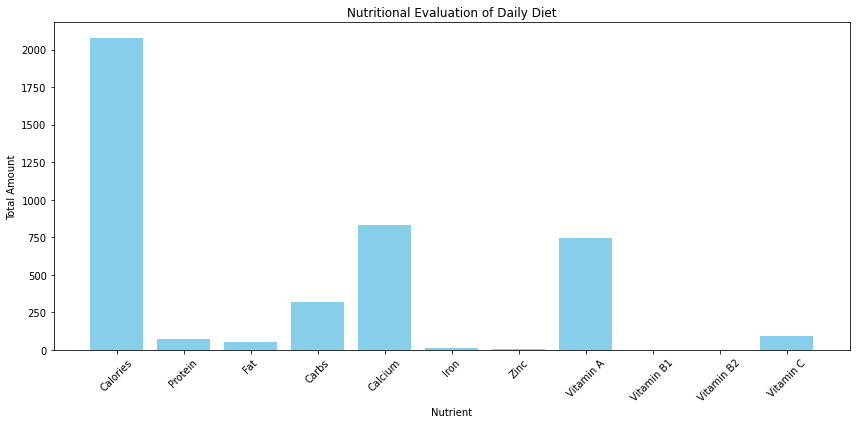

能量与目标值相差: -13.46%
Calcium 达成率: 103.99%
Iron 达成率: 85.47%
Zinc 达成率: 83.75%
Vitamin_a 达成率: 93.44%
Vitamin_b1 达成率: 87.86%
Vitamin_b2 达成率: 100.00%
Vitamin_c 达成率: 93.00%
蛋白质供能比例: 14.40%
脂肪供能比例: 23.91%
碳水化合物供能比例: 61.19%
午餐 的蛋白质氨基酸评分: 59.84
早餐 的蛋白质氨基酸评分: 99.79
晚餐 的蛋白质氨基酸评分: 88.95


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Daily Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 调用膳食营养评价函数
nutrition_results = evaluate_nutrition(selected_foods, selected_quantities, data)

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 调用函数进行能量和营养素评价
intake_ratios = evaluate_energy_and_nutrients(nutrition_results)

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 调用函数进行能量来源评价
energy_sources = evaluate_energy_sources(nutrition_results)

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data):
    reference_aa = {
        '异亮氨酸（mg）': 40,
        '亮氨酸（mg）': 70,
        '赖氨酸（mg）': 55,
        '含硫氨基酸（mg）': 35,
        '芳香族氨基酸（mg）': 60,
        '苏氨酸（mg）': 40,
        '色氨酸（mg）': 10,
        '缬氨酸（mg）': 50
    }

    amino_acid_scores = {}
    meals = data['餐次'].unique()

    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]

        total_aa = {aa: sum(data.loc[data['食物名称'] == food, f'实际摄入{aa}'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities)) for aa in reference_aa}
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        amino_acids_per_g_protein = {aa: total_aa[aa] / total_protein for aa in reference_aa}
        
        # 计算每餐的氨基酸评分
        scores = {aa: (amino_acids_per_g_protein[aa] / reference_aa[aa]) * 100 for aa in reference_aa}
        amino_acid_score = min(scores.values())
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores = evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data)



In [5]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel('合并后的汇总表_更新.xlsx')

# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取用于优化的数据列
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()
lysine = df_new['实际摄入赖氨酸（mg）'].to_list()
leucine = df_new['实际摄入亮氨酸（mg）'].to_list()
isoleucine = df_new['实际摄入异亮氨酸（mg）'].to_list()
sulfur = df_new['实际摄入含硫氨基酸（mg）'].to_list()
aromatic = df_new['实际摄入芳香族氨基酸（mg）'].to_list()
threonine = df_new['实际摄入苏氨酸（mg）'].to_list()
tryptophan = df_new['实际摄入色氨酸（mg）'].to_list()
valine = df_new['实际摄入缬氨酸（mg）'].to_list()

# 创建优化模型
model = LpProblem(name="diet_optimization_amino_acid", sense=LpMaximize)

# 定义决策变量
x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0, upBound=3) for i in range(len(calories))]

# 目标函数：最大化蛋白质氨基酸评分
lysine_score = lpSum(lysine[i] * x[i] for i in range(len(calories))) / 100
leucine_score = lpSum(leucine[i] * x[i] for i in range(len(calories))) / 100
isoleucine_score = lpSum(isoleucine[i] * x[i] for i in range(len(calories))) / 100
sulfur_score = lpSum(sulfur[i] * x[i] for i in range(len(calories))) / 100
aromatic_score = lpSum(aromatic[i] * x[i] for i in range(len(calories))) / 100
threonine_score = lpSum(threonine[i] * x[i] for i in range(len(calories))) / 100
tryptophan_score = lpSum(tryptophan[i] * x[i] for i in range(len(calories))) / 100
valine_score = lpSum(valine[i] * x[i] for i in range(len(calories))) / 100

# 综合氨基酸评分（取最低值）
amino_acid_score = lpSum([lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score])

# 设置目标函数为最大化综合氨基酸评分
model += amino_acid_score, "Total Amino Acid Score"

# 添加约束条件
# 每天摄入食物种类大于12种
model += lpSum([x[i] != 0 for i in range(len(calories))]) >= 12, "Minimum Food Types"

# 每天摄入的食物要包括五大类别
categories = df_new['类别'].unique()
for category in categories:
    model += lpSum([x[i] for i in range(len(calories)) if df_new['类别'][i] == category]) >= 1, f"{category} Category Constraint"

# 能量摄入要求
target_calories = 2400  # 男生
model += lpSum(calories[i] * x[i] for i in range(len(calories))) >= 0.9 * target_calories, "Min Calories"
model += lpSum(calories[i] * x[i] for i in range(len(calories))) <= 1.1 * target_calories, "Max Calories"

# 微量营养素约束
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) >= 700, "Min Calcium"
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) <= 900, "Max Calcium"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) >= 11, "Min Iron"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) <= 13, "Max Iron"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) >= 10, "Min Zinc"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) <= 14, "Max Zinc"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) >= 700, "Min Vitamin A"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) <= 900, "Max Vitamin A"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B1"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B1"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B2"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B2"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) >= 90, "Min Vitamin C"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) <= 110, "Max Vitamin C"

# 宏量营养素约束
total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(calories))]
model += lpSum(4 * protein[i] * x[i] for i in range(len(calories))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Min Protein"
model += lpSum(4 * protein[i] * x[i] for i in range(len(calories))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Max Protein"
model += lpSum(9 * fat[i] * x[i] for i in range(len(calories))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Min Fat"
model += lpSum(9 * fat[i] * x[i] for i in range(len(calories))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Max Fat"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(calories))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Min Carbs"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(calories))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Max Carbs"

# 求解模型
model.solve()

# 打印结果
selected_foods = []
selected_quantities = []
selected_meals = []
selected_prices = []

for i in range(len(calories)):
    if x[i].varValue > 0:
        selected_foods.append(df_new['食物名称'][i])
        selected_quantities.append(x[i].varValue)
        selected_meals.append(df_new['餐次'][i])
        selected_prices.append(df_new['价格（元/份）'][i])
        print(f"食品 {df_new['食物名称'][i]}: {x[i].varValue} 份，餐次：{df_new['餐次'][i]}，单价：{df_new['价格（元/份）'][i]} 元")

print("总成本：", sum(df_new['价格（元/份）'][i] * x[i].varValue for i in range(len(calories))))

# 生成结果表格
result_df = pd.DataFrame({
    '餐次': selected_meals,
    '食物名称': selected_foods,
    '数量（份）': selected_quantities,
    '单价（元）': selected_prices
})

# 保存结果到Excel文件
result_df.to_excel('优化结果_氨基酸评分最大化.xlsx', index=False)

# 显示结果表格
result_df



食品 南瓜粥: 3.0 份，餐次：午餐，单价：1.0 元
食品 鸡蛋柿子汤: 3.0 份，餐次：午餐，单价：8.0 元
食品 拌芹菜花生米: 3.0 份，餐次：午餐，单价：9.0 元
食品 炒芹菜粉: 3.0 份，餐次：午餐，单价：9.0 元
食品 炒肉青椒: 1.0 份，餐次：午餐，单价：15.0 元
食品 炒肉酸菜粉: 1.0 份，餐次：午餐，单价：20.0 元
食品 炒牛肉: 3.0 份，餐次：午餐，单价：40.0 元
食品 牛奶: 1.0 份，餐次：早餐，单价：1.5 元
食品 大米粥: 3.0 份，餐次：早餐，单价：0.5 元
食品 大米饭: 2.0 份，餐次：早餐，单价：0.5 元
食品 煮鸡蛋: 2.0 份，餐次：早餐，单价：1.0 元
食品 煎鸡蛋: 3.0 份，餐次：早餐，单价：3.0 元
食品 南瓜粥: 3.0 份，餐次：早餐，单价：1.0 元
食品 拌芹菜花生米: 3.0 份，餐次：早餐，单价：9.0 元
食品 砂锅面: 3.0 份，餐次：晚餐，单价：30.0 元
食品 拌芹菜花生米: 3.0 份，餐次：晚餐，单价：9.0 元
食品 炒芹菜粉: 3.0 份，餐次：晚餐，单价：9.0 元
食品 红烧肉: 2.0 份，餐次：晚餐，单价：24.0 元
食品 炒牛肉: 3.0 份，餐次：晚餐，单价：40.0 元
食品 苹果: 1.0 份，餐次：晚餐，单价：1.0 元
总成本： 594.0


,餐次,食物名称,数量（份）,单价（元）
0,午餐,南瓜粥,3.0,1.0
1,午餐,鸡蛋柿子汤,3.0,8.0
2,午餐,拌芹菜花生米,3.0,9.0
3,午餐,炒芹菜粉,3.0,9.0
4,午餐,炒肉青椒,1.0,15.0
5,午餐,炒肉酸菜粉,1.0,20.0
6,午餐,炒牛肉,3.0,40.0
7,早餐,牛奶,1.0,1.5
8,早餐,大米粥,3.0,0.5
9,早餐,大米饭,2.0,0.5


总能量: 2822.26 kcal
总蛋白质: 110.79 g
总脂肪: 75.34 g
总碳水化合物: 416.46 g
总钙: 880.6 mg
总铁: 32.92 mg
总锌: 15.83 mg
总维生素A: 880.0 μg
总维生素B1: 1.88 mg
总维生素B2: 1.66 mg
总维生素C: 92.0 mg


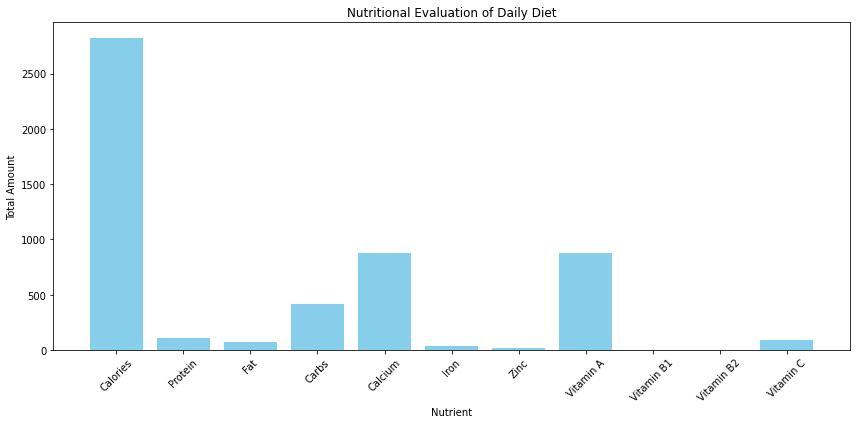

能量与目标值相差: 17.59%
Calcium 达成率: 110.08%
Iron 达成率: 219.47%
Zinc 达成率: 131.92%
Vitamin_a 达成率: 110.00%
Vitamin_b1 达成率: 134.29%
Vitamin_b2 达成率: 118.57%
Vitamin_c 达成率: 92.00%
蛋白质供能比例: 15.70%
脂肪供能比例: 24.03%
碳水化合物供能比例: 59.03%
午餐 的蛋白质氨基酸评分: 126.3
早餐 的蛋白质氨基酸评分: 104.25
晚餐 的蛋白质氨基酸评分: 89.96


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Daily Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 调用膳食营养评价函数
nutrition_results = evaluate_nutrition(selected_foods, selected_quantities, data)

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 调用函数进行能量和营养素评价
intake_ratios = evaluate_energy_and_nutrients(nutrition_results)

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 调用函数进行能量来源评价
energy_sources = evaluate_energy_sources(nutrition_results)

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data):
    reference_aa = {
        '异亮氨酸（mg）': 40,
        '亮氨酸（mg）': 70,
        '赖氨酸（mg）': 55,
        '含硫氨基酸（mg）': 35,
        '芳香族氨基酸（mg）': 60,
        '苏氨酸（mg）': 40,
        '色氨酸（mg）': 10,
        '缬氨酸（mg）': 50
    }

    amino_acid_scores = {}
    meals = data['餐次'].unique()

    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]

        total_aa = {aa: sum(data.loc[data['食物名称'] == food, f'实际摄入{aa}'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities)) for aa in reference_aa}
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        amino_acids_per_g_protein = {aa: total_aa[aa] / total_protein for aa in reference_aa}
        
        # 计算每餐的氨基酸评分
        scores = {aa: (amino_acids_per_g_protein[aa] / reference_aa[aa]) * 100 for aa in reference_aa}
        amino_acid_score = min(scores.values())
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores = evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data)



In [7]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel('合并后的汇总表_更新.xlsx')

# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取用于优化的数据列
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()
lysine = df_new['实际摄入赖氨酸（mg）'].to_list()
leucine = df_new['实际摄入亮氨酸（mg）'].to_list()
isoleucine = df_new['实际摄入异亮氨酸（mg）'].to_list()
sulfur = df_new['实际摄入含硫氨基酸（mg）'].to_list()
aromatic = df_new['实际摄入芳香族氨基酸（mg）'].to_list()
threonine = df_new['实际摄入苏氨酸（mg）'].to_list()
tryptophan = df_new['实际摄入色氨酸（mg）'].to_list()
valine = df_new['实际摄入缬氨酸（mg）'].to_list()

# 创建优化模型
model = LpProblem(name="diet_optimization_amino_acid", sense=LpMaximize)

# 定义决策变量
x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0, upBound=3) for i in range(len(calories))]

# 目标函数：最大化蛋白质氨基酸评分
lysine_score = lpSum(lysine[i] * x[i] for i in range(len(calories))) / 100
leucine_score = lpSum(leucine[i] * x[i] for i in range(len(calories))) / 100
isoleucine_score = lpSum(isoleucine[i] * x[i] for i in range(len(calories))) / 100
sulfur_score = lpSum(sulfur[i] * x[i] for i in range(len(calories))) / 100
aromatic_score = lpSum(aromatic[i] * x[i] for i in range(len(calories))) / 100
threonine_score = lpSum(threonine[i] * x[i] for i in range(len(calories))) / 100
tryptophan_score = lpSum(tryptophan[i] * x[i] for i in range(len(calories))) / 100
valine_score = lpSum(valine[i] * x[i] for i in range(len(calories))) / 100

# 综合氨基酸评分（取最低值）
amino_acid_score = lpSum([lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score])

# 设置目标函数为最大化综合氨基酸评分
model += amino_acid_score, "Total Amino Acid Score"

# 添加约束条件
# 每天摄入食物种类大于12种
model += lpSum([x[i] != 0 for i in range(len(calories))]) >= 12, "Minimum Food Types"

# 每天摄入的食物要包括五大类别
categories = df_new['类别'].unique()
for category in categories:
    model += lpSum([x[i] for i in range(len(calories)) if df_new['类别'][i] == category]) >= 1, f"{category} Category Constraint"

# 能量摄入要求
target_calories = 1900  # 女生
model += lpSum(calories[i] * x[i] for i in range(len(calories))) >= 0.9 * target_calories, "Min Calories"
model += lpSum(calories[i] * x[i] for i in range(len(calories))) <= 1.1 * target_calories, "Max Calories"

# 微量营养素约束
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) >= 700, "Min Calcium"
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) <= 900, "Max Calcium"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) >= 11, "Min Iron"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) <= 13, "Max Iron"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) >= 10, "Min Zinc"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) <= 14, "Max Zinc"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) >= 700, "Min Vitamin A"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) <= 900, "Max Vitamin A"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B1"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B1"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B2"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B2"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) >= 90, "Min Vitamin C"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) <= 110, "Max Vitamin C"

# 宏量营养素约束
total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(calories))]
model += lpSum(4 * protein[i] * x[i] for i in range(len(calories))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Min Protein"
model += lpSum(4 * protein[i] * x[i] for i in range(len(calories))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Max Protein"
model += lpSum(9 * fat[i] * x[i] for i in range(len(calories))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Min Fat"
model += lpSum(9 * fat[i] * x[i] for i in range(len(calories))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Max Fat"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(calories))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Min Carbs"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(calories))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(calories))), "Max Carbs"

# 求解模型
model.solve()

# 打印结果
selected_foods = []
selected_quantities = []
selected_meals = []
selected_prices = []

for i in range(len(calories)):
    if x[i].varValue > 0:
        selected_foods.append(df_new['食物名称'][i])
        selected_quantities.append(x[i].varValue)
        selected_meals.append(df_new['餐次'][i])
        selected_prices.append(df_new['价格（元/份）'][i])
        print(f"食品 {df_new['食物名称'][i]}: {x[i].varValue} 份，餐次：{df_new['餐次'][i]}，单价：{df_new['价格（元/份）'][i]} 元")

print("总成本：", sum(df_new['价格（元/份）'][i] * x[i].varValue for i in range(len(calories))))

# 生成结果表格
result_df = pd.DataFrame({
    '餐次': selected_meals,
    '食物名称': selected_foods,
    '数量（份）': selected_quantities,
    '单价（元）': selected_prices
})

# 保存结果到Excel文件
result_df.to_excel('优化结果_氨基酸评分最大化.xlsx', index=False)

# 显示结果表格
result_df



食品 大米饭: 3.0 份，餐次：午餐，单价：0.5 元
食品 南瓜粥: 3.0 份，餐次：午餐，单价：1.0 元
食品 拌芹菜花生米: 3.0 份，餐次：午餐，单价：9.0 元
食品 炒芹菜粉: 3.0 份，餐次：午餐，单价：9.0 元
食品 木须柿子: 3.0 份，餐次：午餐，单价：12.0 元
食品 木须瓜片: 3.0 份，餐次：午餐，单价：12.0 元
食品 炒肉青椒: 1.0 份，餐次：午餐，单价：15.0 元
食品 炒肉酸菜粉: 2.0 份，餐次：午餐，单价：20.0 元
食品 炒牛肉: 3.0 份，餐次：午餐，单价：40.0 元
食品 牛奶: 1.0 份，餐次：早餐，单价：1.5 元
食品 蒸地瓜: 1.0 份，餐次：早餐，单价：1.0 元
食品 南瓜粥: 2.0 份，餐次：早餐，单价：1.0 元
食品 拌芹菜花生米: 3.0 份，餐次：早餐，单价：9.0 元
食品 大米饭: 2.0 份，餐次：晚餐，单价：0.5 元
食品 小米粥: 1.0 份，餐次：晚餐，单价：0.5 元
食品 砂锅面: 1.0 份，餐次：晚餐，单价：30.0 元
食品 拌芹菜花生米: 3.0 份，餐次：晚餐，单价：9.0 元
食品 炒芹菜粉: 3.0 份，餐次：晚餐，单价：9.0 元
食品 木须柿子: 1.0 份，餐次：晚餐，单价：12.0 元
食品 木须瓜片: 3.0 份，餐次：晚餐，单价：12.0 元
食品 红烧肉: 2.0 份，餐次：晚餐，单价：24.0 元
食品 炒牛肉: 3.0 份，餐次：晚餐，单价：40.0 元
总成本： 638.5


,餐次,食物名称,数量（份）,单价（元）
0,午餐,大米饭,3.0,0.5
1,午餐,南瓜粥,3.0,1.0
2,午餐,拌芹菜花生米,3.0,9.0
3,午餐,炒芹菜粉,3.0,9.0
4,午餐,木须柿子,3.0,12.0
5,午餐,木须瓜片,3.0,12.0
6,午餐,炒肉青椒,1.0,15.0
7,午餐,炒肉酸菜粉,2.0,20.0
8,午餐,炒牛肉,3.0,40.0
9,早餐,牛奶,1.0,1.5


总能量: 2149.6 kcal
总蛋白质: 81.5 g
总脂肪: 63.66 g
总碳水化合物: 304.53 g
总钙: 753.95 mg
总铁: 18.77 mg
总锌: 11.97 mg
总维生素A: 732.2 μg
总维生素B1: 1.41 mg
总维生素B2: 1.32 mg
总维生素C: 93.0 mg


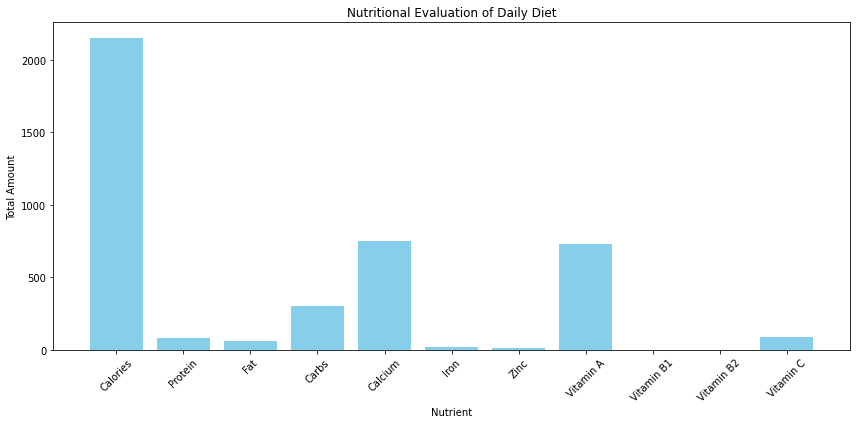

能量与目标值相差: -10.43%
Calcium 达成率: 94.24%
Iron 达成率: 125.13%
Zinc 达成率: 99.75%
Vitamin_a 达成率: 91.53%
Vitamin_b1 达成率: 100.71%
Vitamin_b2 达成率: 94.29%
Vitamin_c 达成率: 93.00%
蛋白质供能比例: 15.17%
脂肪供能比例: 26.65%
碳水化合物供能比例: 56.67%
午餐 的蛋白质氨基酸评分: 109.55
早餐 的蛋白质氨基酸评分: 83.73
晚餐 的蛋白质氨基酸评分: 100.2


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Daily Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 调用膳食营养评价函数
nutrition_results = evaluate_nutrition(selected_foods, selected_quantities, data)

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 调用函数进行能量和营养素评价
intake_ratios = evaluate_energy_and_nutrients(nutrition_results)

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 调用函数进行能量来源评价
energy_sources = evaluate_energy_sources(nutrition_results)

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data):
    reference_aa = {
        '异亮氨酸（mg）': 40,
        '亮氨酸（mg）': 70,
        '赖氨酸（mg）': 55,
        '含硫氨基酸（mg）': 35,
        '芳香族氨基酸（mg）': 60,
        '苏氨酸（mg）': 40,
        '色氨酸（mg）': 10,
        '缬氨酸（mg）': 50
    }

    amino_acid_scores = {}
    meals = data['餐次'].unique()

    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]

        total_aa = {aa: sum(data.loc[data['食物名称'] == food, f'实际摄入{aa}'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities)) for aa in reference_aa}
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        amino_acids_per_g_protein = {aa: total_aa[aa] / total_protein for aa in reference_aa}
        
        # 计算每餐的氨基酸评分
        scores = {aa: (amino_acids_per_g_protein[aa] / reference_aa[aa]) * 100 for aa in reference_aa}
        amino_acid_score = min(scores.values())
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores = evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data)



In [9]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel('合并后的汇总表_更新.xlsx')

# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取用于优化的数据列
prices = df_new['价格（元/份）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()
lysine = df_new['实际摄入赖氨酸（mg）'].to_list()
leucine = df_new['实际摄入亮氨酸（mg）'].to_list()
isoleucine = df_new['实际摄入异亮氨酸（mg）'].to_list()
sulfur = df_new['实际摄入含硫氨基酸（mg）'].to_list()
aromatic = df_new['实际摄入芳香族氨基酸（mg）'].to_list()
threonine = df_new['实际摄入苏氨酸（mg）'].to_list()
tryptophan = df_new['实际摄入色氨酸（mg）'].to_list()
valine = df_new['实际摄入缬氨酸（mg）'].to_list()

# 创建优化模型
model = LpProblem(name="diet_optimization_combined", sense=LpMaximize)

# 定义决策变量
x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0, upBound=3) for i in range(len(prices))]

# 计算氨基酸评分
lysine_score = lpSum(lysine[i] * x[i] for i in range(len(prices))) / 100
leucine_score = lpSum(leucine[i] * x[i] for i in range(len(prices))) / 100
isoleucine_score = lpSum(isoleucine[i] * x[i] for i in range(len(prices))) / 100
sulfur_score = lpSum(sulfur[i] * x[i] for i in range(len(prices))) / 100
aromatic_score = lpSum(aromatic[i] * x[i] for i in range(len(prices))) / 100
threonine_score = lpSum(threonine[i] * x[i] for i in range(len(prices))) / 100
tryptophan_score = lpSum(tryptophan[i] * x[i] for i in range(len(prices))) / 100
valine_score = lpSum(valine[i] * x[i] for i in range(len(prices))) / 100

# 综合氨基酸评分（取最低值）
amino_acid_score = lpSum([lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score])

# 设置目标函数为综合氨基酸评分和成本的加权和
weight_amino_acid = 0.5  # 氨基酸评分的权重
weight_cost = 0.5        # 成本的权重
model += weight_amino_acid * amino_acid_score - weight_cost * lpSum(prices[i] * x[i] for i in range(len(prices))), "Combined Objective"

# 添加约束条件
# 每天摄入食物种类大于12种
model += lpSum([x[i] != 0 for i in range(len(prices))]) >= 12, "Minimum Food Types"

# 每天摄入的食物要包括五大类别
categories = df_new['类别'].unique()
for category in categories:
    model += lpSum([x[i] for i in range(len(prices)) if df_new['类别'][i] == category]) >= 1, f"{category} Category Constraint"

# 能量摄入要求
target_calories = 2400  # 男生
model += lpSum(calories[i] * x[i] for i in range(len(prices))) >= 0.9 * target_calories, "Min Calories"
model += lpSum(calories[i] * x[i] for i in range(len(prices))) <= 1.1 * target_calories, "Max Calories"

# 微量营养素约束
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) >= 700, "Min Calcium"
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) <= 900, "Max Calcium"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) >= 11, "Min Iron"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) <= 13, "Max Iron"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) >= 10, "Min Zinc"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) <= 14, "Max Zinc"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) >= 700, "Min Vitamin A"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) <= 900, "Max Vitamin A"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B1"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B1"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B2"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B2"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) >= 90, "Min Vitamin C"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) <= 110, "Max Vitamin C"

# 宏量营养素约束
total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(prices))]
model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Min Protein"
model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Max Protein"
model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Min Fat"
model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Max Fat"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Min Carbs"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Max Carbs"

# 求解模型
model.solve()

# 打印结果
selected_foods = []
selected_quantities = []
selected_meals = []
selected_prices = []

for i in range(len(prices)):
    if x[i].varValue > 0:
        selected_foods.append(df_new['食物名称'][i])
        selected_quantities.append(x[i].varValue)
        selected_meals.append(df_new['餐次'][i])
        selected_prices.append(df_new['价格（元/份）'][i])
        print(f"食品 {df_new['食物名称'][i]}: {x[i].varValue} 份，餐次：{df_new['餐次'][i]}，单价：{df_new['价格（元/份）'][i]} 元")

print("总成本：", sum(df_new['价格（元/份）'][i] * x[i].varValue for i in range(len(prices))))

# 生成结果表格
result_df = pd.DataFrame({
    '餐次': selected_meals,
    '食物名称': selected_foods,
    '数量（份）': selected_quantities,
    '单价（元）': selected_prices
})

# 保存结果到Excel文件
result_df.to_excel('优化结果_兼顾氨基酸评分和经济性.xlsx', index=False)

# 显示结果表格
result_df



食品 大米饭: 3.0 份，餐次：午餐，单价：0.5 元
食品 牛奶: 3.0 份，餐次：早餐，单价：1.5 元
食品 大米粥: 3.0 份，餐次：早餐，单价：0.5 元
食品 大米饭: 3.0 份，餐次：早餐，单价：0.5 元
食品 蒸地瓜: 3.0 份，餐次：早餐，单价：1.0 元
食品 南瓜粥: 1.0 份，餐次：早餐，单价：1.0 元
食品 橙子: 1.0 份，餐次：早餐，单价：1.0 元
食品 葡萄: 2.0 份，餐次：早餐，单价：1.0 元
食品 大米饭: 3.0 份，餐次：晚餐，单价：0.5 元
食品 豆浆: 1.0 份，餐次：晚餐，单价：1.5 元
食品 小米粥: 3.0 份，餐次：晚餐，单价：0.5 元
食品 茄汁沙丁鱼: 3.0 份，餐次：晚餐，单价：7.0 元
食品 香蕉: 1.0 份，餐次：晚餐，单价：1.0 元
食品 柚子: 2.0 份，餐次：晚餐，单价：1.0 元
食品 苹果: 1.0 份，餐次：晚餐，单价：1.0 元
总成本： 45.5


,餐次,食物名称,数量（份）,单价（元）
0,午餐,大米饭,3.0,0.5
1,早餐,牛奶,3.0,1.5
2,早餐,大米粥,3.0,0.5
3,早餐,大米饭,3.0,0.5
4,早餐,蒸地瓜,3.0,1.0
5,早餐,南瓜粥,1.0,1.0
6,早餐,橙子,1.0,1.0
7,早餐,葡萄,2.0,1.0
8,晚餐,大米饭,3.0,0.5
9,晚餐,豆浆,1.0,1.5


总能量: 2637.12 kcal
总蛋白质: 97.97 g
总脂肪: 58.72 g
总碳水化合物: 424.08 g
总钙: 863.95 mg
总铁: 12.9 mg
总锌: 10.09 mg
总维生素A: 860.4 μg
总维生素B1: 1.21 mg
总维生素B2: 1.49 mg
总维生素C: 110.0 mg


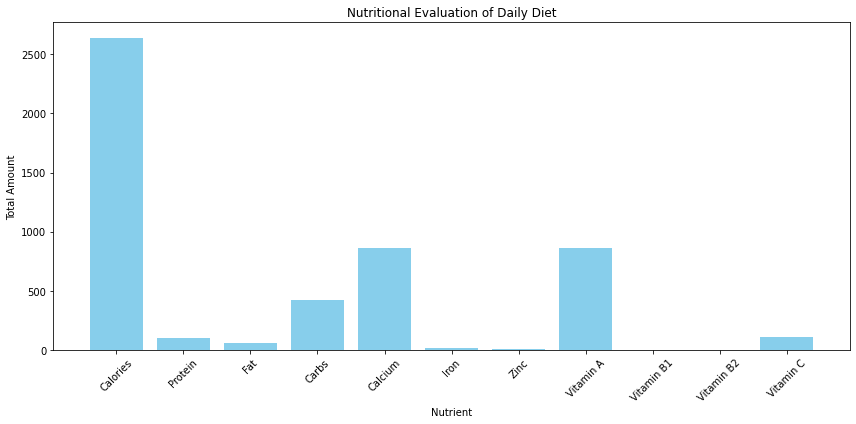

能量与目标值相差: 9.88%
Calcium 达成率: 107.99%
Iron 达成率: 86.00%
Zinc 达成率: 84.08%
Vitamin_a 达成率: 107.55%
Vitamin_b1 达成率: 86.43%
Vitamin_b2 达成率: 106.43%
Vitamin_c 达成率: 110.00%
蛋白质供能比例: 14.86%
脂肪供能比例: 20.04%
碳水化合物供能比例: 64.32%
午餐 的蛋白质氨基酸评分: 59.84
早餐 的蛋白质氨基酸评分: 86.88
晚餐 的蛋白质氨基酸评分: 103.46


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Daily Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 调用膳食营养评价函数
nutrition_results = evaluate_nutrition(selected_foods, selected_quantities, data)

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 调用函数进行能量和营养素评价
intake_ratios = evaluate_energy_and_nutrients(nutrition_results)

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 调用函数进行能量来源评价
energy_sources = evaluate_energy_sources(nutrition_results)

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data):
    reference_aa = {
        '异亮氨酸（mg）': 40,
        '亮氨酸（mg）': 70,
        '赖氨酸（mg）': 55,
        '含硫氨基酸（mg）': 35,
        '芳香族氨基酸（mg）': 60,
        '苏氨酸（mg）': 40,
        '色氨酸（mg）': 10,
        '缬氨酸（mg）': 50
    }

    amino_acid_scores = {}
    meals = data['餐次'].unique()

    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]

        total_aa = {aa: sum(data.loc[data['食物名称'] == food, f'实际摄入{aa}'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities)) for aa in reference_aa}
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        amino_acids_per_g_protein = {aa: total_aa[aa] / total_protein for aa in reference_aa}
        
        # 计算每餐的氨基酸评分
        scores = {aa: (amino_acids_per_g_protein[aa] / reference_aa[aa]) * 100 for aa in reference_aa}
        amino_acid_score = min(scores.values())
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores = evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data)



In [11]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel('合并后的汇总表_更新.xlsx')

# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取用于优化的数据列
prices = df_new['价格（元/份）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()
lysine = df_new['实际摄入赖氨酸（mg）'].to_list()
leucine = df_new['实际摄入亮氨酸（mg）'].to_list()
isoleucine = df_new['实际摄入异亮氨酸（mg）'].to_list()
sulfur = df_new['实际摄入含硫氨基酸（mg）'].to_list()
aromatic = df_new['实际摄入芳香族氨基酸（mg）'].to_list()
threonine = df_new['实际摄入苏氨酸（mg）'].to_list()
tryptophan = df_new['实际摄入色氨酸（mg）'].to_list()
valine = df_new['实际摄入缬氨酸（mg）'].to_list()

# 创建优化模型
model = LpProblem(name="diet_optimization_combined", sense=LpMaximize)

# 定义决策变量
x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0, upBound=3) for i in range(len(prices))]

# 计算氨基酸评分
lysine_score = lpSum(lysine[i] * x[i] for i in range(len(prices))) / 100
leucine_score = lpSum(leucine[i] * x[i] for i in range(len(prices))) / 100
isoleucine_score = lpSum(isoleucine[i] * x[i] for i in range(len(prices))) / 100
sulfur_score = lpSum(sulfur[i] * x[i] for i in range(len(prices))) / 100
aromatic_score = lpSum(aromatic[i] * x[i] for i in range(len(prices))) / 100
threonine_score = lpSum(threonine[i] * x[i] for i in range(len(prices))) / 100
tryptophan_score = lpSum(tryptophan[i] * x[i] for i in range(len(prices))) / 100
valine_score = lpSum(valine[i] * x[i] for i in range(len(prices))) / 100

# 综合氨基酸评分（取最低值）
amino_acid_score = lpSum([lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score])

# 设置目标函数为综合氨基酸评分和成本的加权和
weight_amino_acid = 0.5  # 氨基酸评分的权重
weight_cost = 0.5        # 成本的权重
model += weight_amino_acid * amino_acid_score - weight_cost * lpSum(prices[i] * x[i] for i in range(len(prices))), "Combined Objective"

# 添加约束条件
# 每天摄入食物种类大于12种
model += lpSum([x[i] != 0 for i in range(len(prices))]) >= 12, "Minimum Food Types"

# 每天摄入的食物要包括五大类别
categories = df_new['类别'].unique()
for category in categories:
    model += lpSum([x[i] for i in range(len(prices)) if df_new['类别'][i] == category]) >= 1, f"{category} Category Constraint"

# 能量摄入要求
target_calories = 1900  # 女生
model += lpSum(calories[i] * x[i] for i in range(len(prices))) >= 0.9 * target_calories, "Min Calories"
model += lpSum(calories[i] * x[i] for i in range(len(prices))) <= 1.1 * target_calories, "Max Calories"

# 微量营养素约束
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) >= 700, "Min Calcium"
model += lpSum(calcium[i] * x[i] for i in range(len(cost))) <= 900, "Max Calcium"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) >= 11, "Min Iron"
model += lpSum(iron[i] * x[i] for i in range(len(cost))) <= 13, "Max Iron"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) >= 10, "Min Zinc"
model += lpSum(zinc[i] * x[i] for i in range(len(cost))) <= 14, "Max Zinc"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) >= 700, "Min Vitamin A"
model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) <= 900, "Max Vitamin A"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B1"
model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B1"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B2"
model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B2"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) >= 90, "Min Vitamin C"
model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) <= 110, "Max Vitamin C"

# 宏量营养素约束
total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(prices))]
model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Min Protein"
model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Max Protein"
model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Min Fat"
model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Max Fat"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Min Carbs"
model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), "Max Carbs"

# 求解模型
model.solve()

# 打印结果
selected_foods = []
selected_quantities = []
selected_meals = []
selected_prices = []

for i in range(len(prices)):
    if x[i].varValue > 0:
        selected_foods.append(df_new['食物名称'][i])
        selected_quantities.append(x[i].varValue)
        selected_meals.append(df_new['餐次'][i])
        selected_prices.append(df_new['价格（元/份）'][i])
        print(f"食品 {df_new['食物名称'][i]}: {x[i].varValue} 份，餐次：{df_new['餐次'][i]}，单价：{df_new['价格（元/份）'][i]} 元")

print("总成本：", sum(df_new['价格（元/份）'][i] * x[i].varValue for i in range(len(prices))))

# 生成结果表格
result_df = pd.DataFrame({
    '餐次': selected_meals,
    '食物名称': selected_foods,
    '数量（份）': selected_quantities,
    '单价（元）': selected_prices
})

# 保存结果到Excel文件
result_df.to_excel('优化结果_兼顾氨基酸评分和经济性.xlsx', index=False)

# 显示结果表格
result_df



食品 大米饭: 3.0 份，餐次：午餐，单价：0.5 元
食品 烧排骨: 1.0 份，餐次：午餐，单价：24.0 元
食品 牛奶: 3.0 份，餐次：早餐，单价：1.5 元
食品 大米粥: 2.0 份，餐次：早餐，单价：0.5 元
食品 小米粥: 3.0 份，餐次：早餐，单价：0.5 元
食品 大米饭: 3.0 份，餐次：早餐，单价：0.5 元
食品 煮鸡蛋: 3.0 份，餐次：早餐，单价：1.0 元
食品 橙子: 1.0 份，餐次：早餐，单价：1.0 元
食品 大米饭: 3.0 份，餐次：晚餐，单价：0.5 元
食品 小米粥: 1.0 份，餐次：晚餐，单价：0.5 元
食品 柚子: 3.0 份，餐次：晚餐，单价：1.0 元
食品 苹果: 1.0 份，餐次：晚餐，单价：1.0 元
总成本： 44.0


,餐次,食物名称,数量（份）,单价（元）
0,午餐,大米饭,3.0,0.5
1,午餐,烧排骨,1.0,24.0
2,早餐,牛奶,3.0,1.5
3,早餐,大米粥,2.0,0.5
4,早餐,小米粥,3.0,0.5
5,早餐,大米饭,3.0,0.5
6,早餐,煮鸡蛋,3.0,1.0
7,早餐,橙子,1.0,1.0
8,晚餐,大米饭,3.0,0.5
9,晚餐,小米粥,1.0,0.5


总能量: 2087.94 kcal
总蛋白质: 77.74 g
总脂肪: 49.86 g
总碳水化合物: 329.07 g
总钙: 811.0 mg
总铁: 12.07 mg
总锌: 10.3 mg
总维生素A: 737.3 μg
总维生素B1: 1.37 mg
总维生素B2: 1.41 mg
总维生素C: 105.0 mg


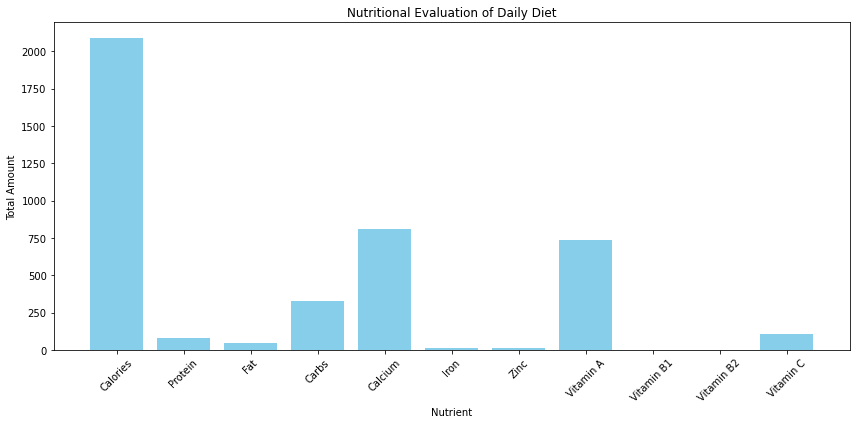

能量与目标值相差: -13.00%
Calcium 达成率: 101.38%
Iron 达成率: 80.47%
Zinc 达成率: 85.83%
Vitamin_a 达成率: 92.16%
Vitamin_b1 达成率: 97.86%
Vitamin_b2 达成率: 100.71%
Vitamin_c 达成率: 105.00%
蛋白质供能比例: 14.89%
脂肪供能比例: 21.49%
碳水化合物供能比例: 63.04%
午餐 的蛋白质氨基酸评分: 95.39
早餐 的蛋白质氨基酸评分: 100.35
晚餐 的蛋白质氨基酸评分: 58.9


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Daily Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 调用膳食营养评价函数
nutrition_results = evaluate_nutrition(selected_foods, selected_quantities, data)

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 调用函数进行能量和营养素评价
intake_ratios = evaluate_energy_and_nutrients(nutrition_results)

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 调用函数进行能量来源评价
energy_sources = evaluate_energy_sources(nutrition_results)

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data):
    reference_aa = {
        '异亮氨酸（mg）': 40,
        '亮氨酸（mg）': 70,
        '赖氨酸（mg）': 55,
        '含硫氨基酸（mg）': 35,
        '芳香族氨基酸（mg）': 60,
        '苏氨酸（mg）': 40,
        '色氨酸（mg）': 10,
        '缬氨酸（mg）': 50
    }

    amino_acid_scores = {}
    meals = data['餐次'].unique()

    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]

        total_aa = {aa: sum(data.loc[data['食物名称'] == food, f'实际摄入{aa}'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities)) for aa in reference_aa}
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        amino_acids_per_g_protein = {aa: total_aa[aa] / total_protein for aa in reference_aa}
        
        # 计算每餐的氨基酸评分
        scores = {aa: (amino_acids_per_g_protein[aa] / reference_aa[aa]) * 100 for aa in reference_aa}
        amino_acid_score = min(scores.values())
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores = evaluate_amino_acid_scores(selected_foods, selected_quantities, selected_meals, data)

